In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is a skewness present in Survived,Pclass,Age,SibSp,Parch and Fare Fields.
There are outliers present in PassengerId,Age,SibSp,Parch and Fare.

In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


null parameters are present in the dataframe.

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thera is a Nan values present in Age,Cabin and Embarked field. 

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'].astype(str))
df['Cabin']=le.fit_transform(df['Cabin'].astype(str))
df['Sex']=le.fit_transform(df['Sex'].astype(str))

In [12]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [13]:
df['Cabin']

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int32

In [14]:
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [16]:
df['Cabin'].isnull().sum()

0

In [17]:
df['Embarked'].isnull().sum()

0

In [18]:
df['Age'].isnull().sum()

0

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55.0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147.0,2.0


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
df.drop('Name',axis=1,inplace=True)

In [22]:
df.drop('Ticket',axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,147.0,2.0
1,2,1,1,0,38.0,1,0,71.2833,81.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,147.0,2.0
3,4,1,1,0,35.0,1,0,53.1000,55.0,2.0
4,5,0,3,1,35.0,0,0,8.0500,147.0,2.0


In [24]:
df_cor=df.corr()
df_cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.684121,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.096681,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.235406,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.028324,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.503355,-0.221226
Cabin,-0.035077,-0.254888,0.684121,0.096681,-0.235406,0.043593,-0.028324,-0.503355,1.000000,0.193205
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,0.193205,1.000000


Survived field is highly correlated with Sex and Fare.
Survived field is least correlated with PassengerId

<AxesSubplot:>

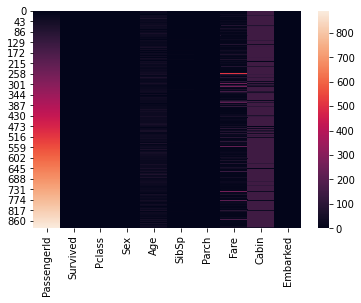

In [25]:
sns.heatmap(df)

There is no null values in dataframe.

<AxesSubplot:>

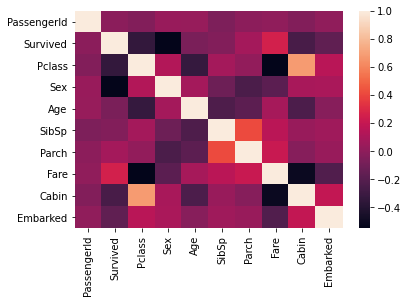

In [26]:
sns.heatmap(df_cor)

<AxesSubplot:>

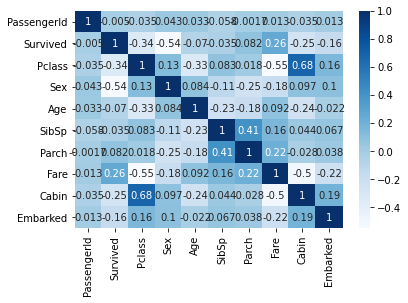

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cor,cmap='Blues',annot=True)

<AxesSubplot:>

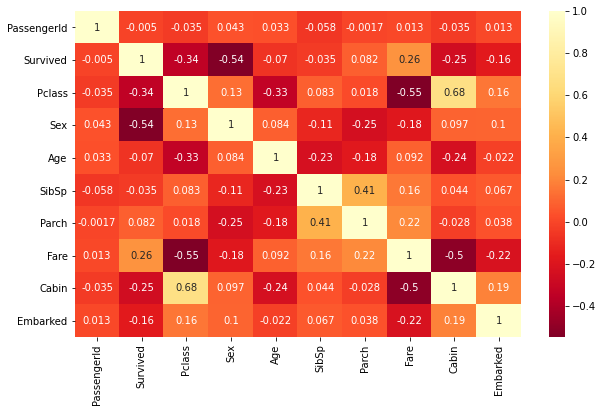

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

Survived is highly correlated with Fare and least related with PassengerId.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

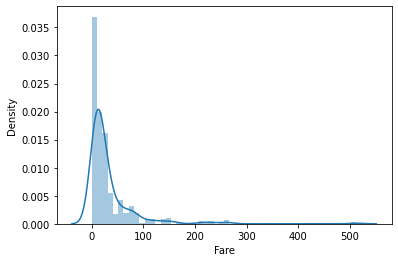

In [29]:
sns.distplot(df['Fare'])

skewness is present in this graph.

<AxesSubplot:xlabel='Sex', ylabel='Density'>

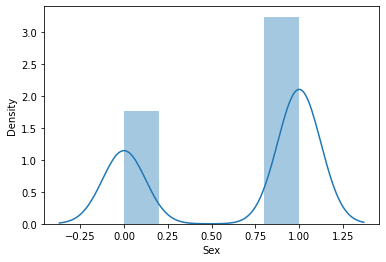

In [30]:
sns.distplot(df['Sex'])

skewness is present in Sex field.

<AxesSubplot:xlabel='Survived', ylabel='Density'>

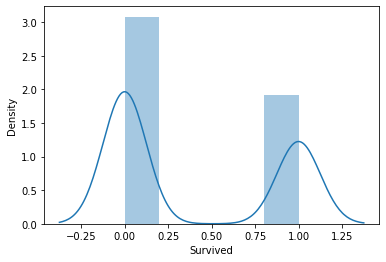

In [31]:
sns.distplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

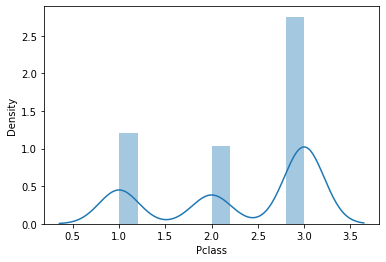

In [32]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

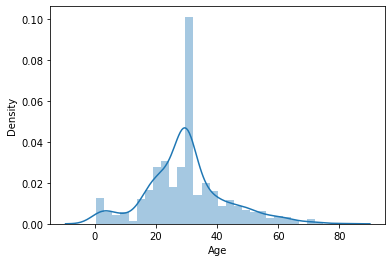

In [33]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

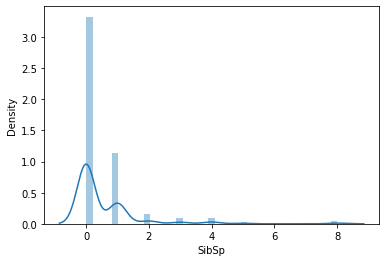

In [34]:
sns.distplot(df['SibSp'])

skewness is present in SibSp field.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

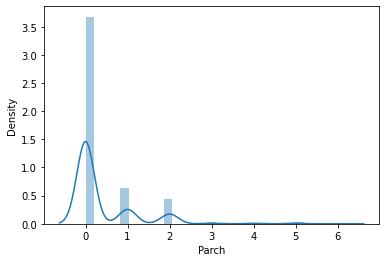

In [35]:
sns.distplot(df['Parch'])

skewness is present in Parch field.

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

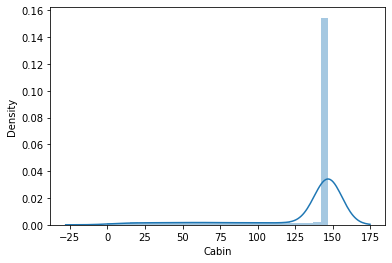

In [36]:
sns.distplot(df['Cabin'])

skewness is present in Cabin field. 

In [37]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

skewness is present in Pclass,Sex,Sibsp,Parch,fare,cabin and Embarked.

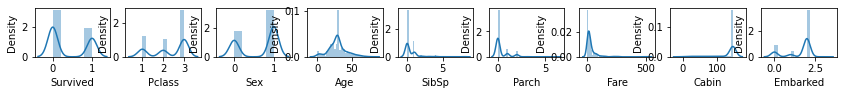

In [38]:
collist=df.columns.values
ncol=10
nrows=15
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

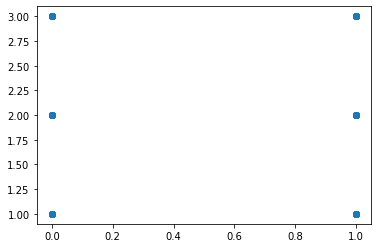

In [39]:
plt.scatter(df['Survived'],df['Pclass'])

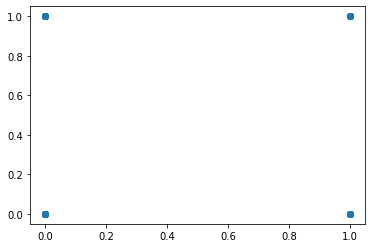

In [40]:
plt.scatter(df['Survived'],df['Sex'])

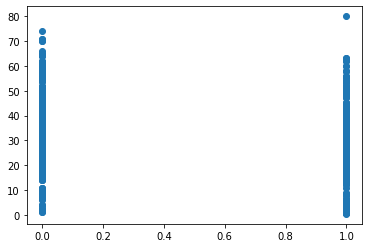

In [41]:
plt.scatter(df['Survived'],df['Age'])

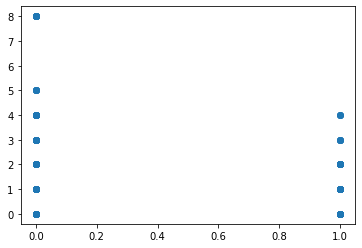

In [42]:
plt.scatter(df['Survived'],df['SibSp'])

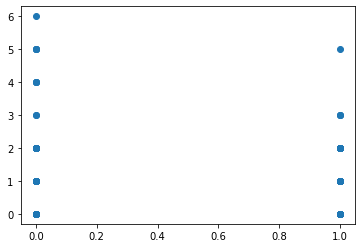

In [43]:
plt.scatter(df['Survived'],df['Parch'])

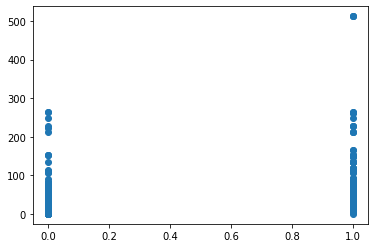

In [44]:
plt.scatter(df['Survived'],df['Fare'])

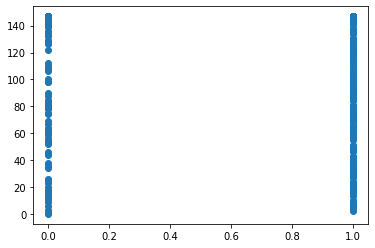

In [45]:
plt.scatter(df['Survived'],df['Cabin'])

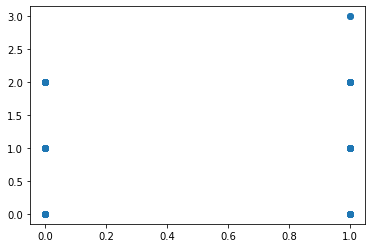

In [46]:
plt.scatter(df['Survived'],df['Embarked'])

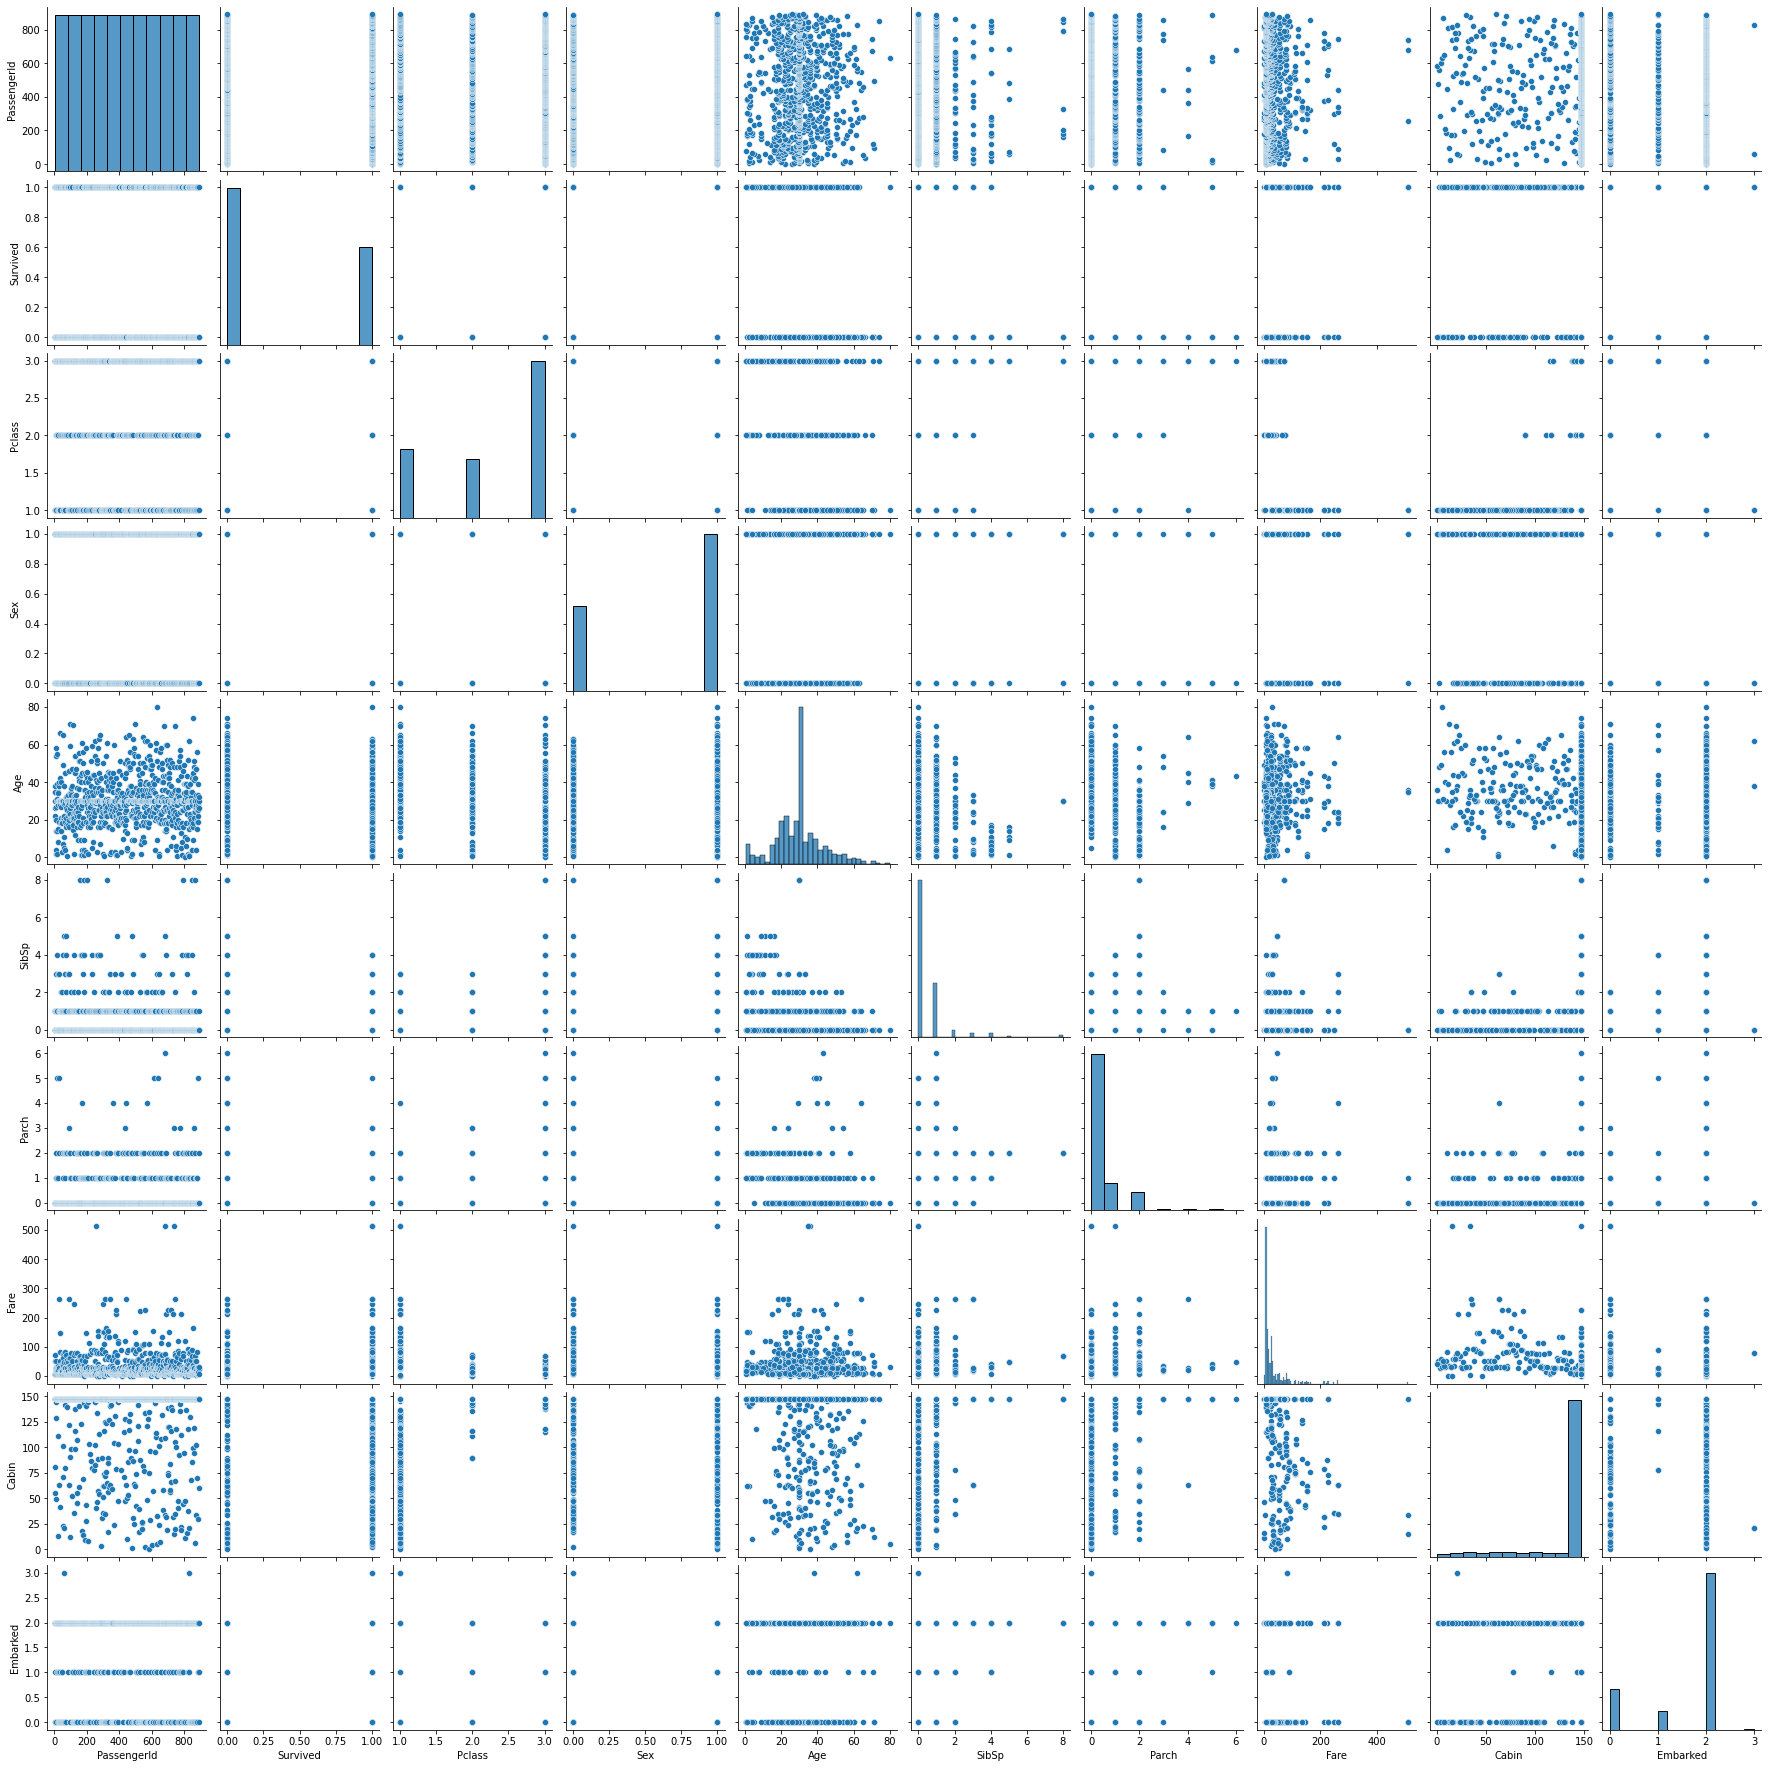

In [47]:
sns.pairplot(df)

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

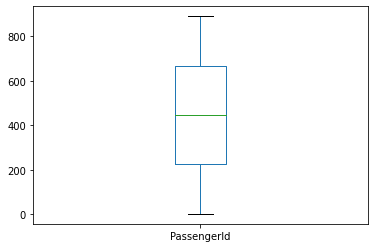

In [49]:
df['PassengerId'].plot.box()

 no outliers are present.

<AxesSubplot:>

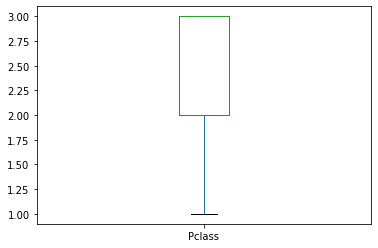

In [50]:
df['Pclass'].plot.box()

No outliers are present.

<AxesSubplot:>

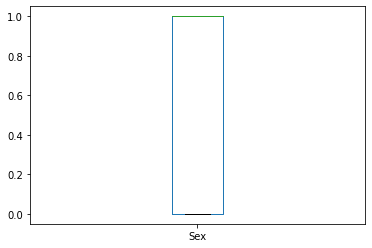

In [51]:
df['Sex'].plot.box()

No outliers are present.

<AxesSubplot:>

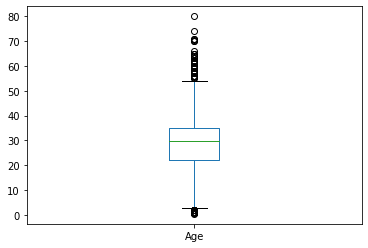

In [52]:
df['Age'].plot.box()

Outliers are present.

<AxesSubplot:>

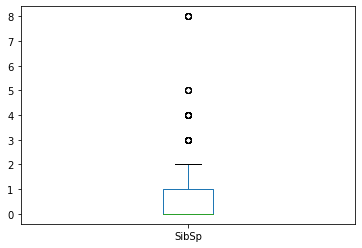

In [53]:
df['SibSp'].plot.box()

outliers are present.

<AxesSubplot:>

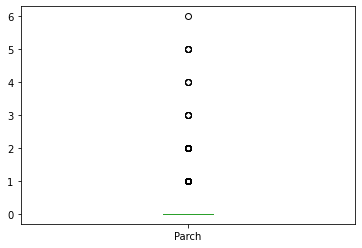

In [54]:
df['Parch'].plot.box()

outliers are present.

<AxesSubplot:>

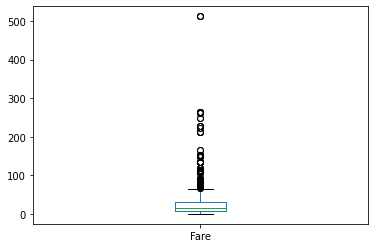

In [55]:
df['Fare'].plot.box()

outliers are present.

<AxesSubplot:>

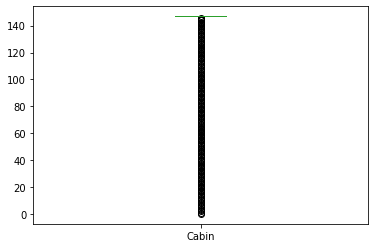

In [56]:
df['Cabin'].plot.box()

outliers are present.

<AxesSubplot:>

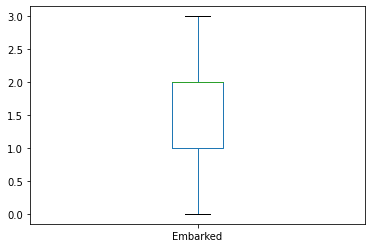

In [57]:
df['Embarked'].plot.box()

No outliers are present.

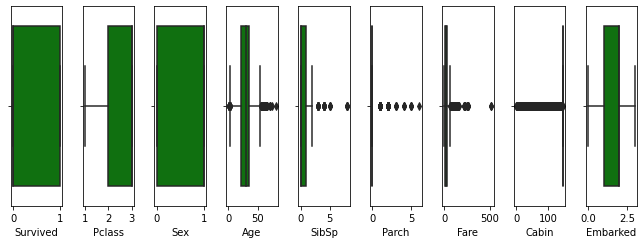

In [58]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Skewness

In [59]:
df['Pclass']=np.log1p(df['Pclass'])

In [60]:
df['Sex']=np.log1p(df['Sex'])

In [61]:
df['SibSp']=np.log1p(df['SibSp'])

In [62]:
df['Parch']=np.log1p(df['Parch'])

In [63]:
df['Fare']=np.log1p(df['Fare'])

In [64]:
df['Cabin']=np.log1p(df['Cabin'])

In [65]:
df['Embarked']=np.log1p(df['Embarked'])

In [66]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.772196
Sex           -0.618921
Age            0.434488
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Cabin         -3.838789
Embarked      -1.382141
dtype: float64

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,1.386294,0.693147,22.0,0.693147,0.0,2.110213,4.997212,1.098612
1,2,1,0.693147,0.000000,38.0,0.693147,0.0,4.280593,4.406719,0.000000
2,3,1,1.386294,0.000000,26.0,0.000000,0.0,2.188856,4.997212,1.098612
3,4,1,0.693147,0.000000,35.0,0.693147,0.0,3.990834,4.025352,1.098612
4,5,0,1.386294,0.693147,35.0,0.000000,0.0,2.202765,4.997212,1.098612


In [69]:
df.drop('PassengerId',axis=1,inplace=True)

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.386294,0.693147,22.0,0.693147,0.0,2.110213,4.997212,1.098612
1,1,0.693147,0.000000,38.0,0.693147,0.0,4.280593,4.406719,0.000000
2,1,1.386294,0.000000,26.0,0.000000,0.0,2.188856,4.997212,1.098612
3,1,0.693147,0.000000,35.0,0.693147,0.0,3.990834,4.025352,1.098612
4,0,1.386294,0.693147,35.0,0.000000,0.0,2.202765,4.997212,1.098612


In [71]:
x=df.iloc[:,1:9]
y=df.iloc[:,0]

In [72]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.386294,0.693147,22.000000,0.693147,0.000000,2.110213,4.997212,1.098612
1,0.693147,0.000000,38.000000,0.693147,0.000000,4.280593,4.406719,0.000000
2,1.386294,0.000000,26.000000,0.000000,0.000000,2.188856,4.997212,1.098612
3,0.693147,0.000000,35.000000,0.693147,0.000000,3.990834,4.025352,1.098612
4,1.386294,0.693147,35.000000,0.000000,0.000000,2.202765,4.997212,1.098612
...,...,...,...,...,...,...,...,...
886,1.098612,0.693147,27.000000,0.000000,0.000000,2.639057,4.997212,1.098612
887,0.693147,0.000000,19.000000,0.000000,0.000000,3.433987,3.433987,1.098612
888,1.386294,0.000000,29.699118,0.693147,1.098612,3.196630,4.997212,1.098612
889,0.693147,0.693147,26.000000,0.000000,0.000000,3.433987,4.110874,0.000000


In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Removing outliers

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 13,  23,  25,  59,  61,  71,  96,  96, 116, 159, 167, 170, 174,
       179, 180, 185, 201, 209, 258, 263, 271, 277, 284, 302, 324, 329,
       360, 386, 413, 438, 445, 466, 475, 480, 481, 493, 523, 540, 556,
       567, 583, 597, 599, 610, 630, 630, 633, 638, 647, 672, 674, 678,
       679, 683, 690, 732, 737, 737, 745, 745, 781, 792, 806, 806, 815,
       815, 822, 829, 846, 851, 863, 867, 885], dtype=int64), array([5, 7, 5, 4, 7, 4, 3, 7, 3, 4, 5, 7, 7, 6, 4, 7, 4, 7, 6, 6, 6, 6,
       7, 6, 4, 7, 5, 4, 6, 5, 7, 6, 7, 4, 6, 3, 7, 7, 7, 5, 7, 6, 7, 5,
       3, 7, 6, 5, 7, 3, 6, 5, 6, 4, 7, 6, 6, 7, 3, 7, 7, 4, 6, 7, 6, 7,
       6, 7, 4, 3, 4, 7, 5], dtype=int64))


In [75]:
z[13][5]

3.8256905414558133

In [76]:
z[885][5]

3.8256905414558133

In [77]:
df_new=df[(z<3).all(axis=1)]

In [78]:
df_new.shape

(824, 9)

In [79]:
df.shape

(891, 9)

In [80]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [81]:
def getScore(m):
    max_score=0
    max_i=0
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        acc=accuracy_score(y_test,pred)
        if(acc>max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [82]:
getScore(lr)

max score 0.8406779661016949
max i 70
[[149  31]
 [ 38  77]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       180
           1       0.71      0.67      0.69       115

    accuracy                           0.77       295
   macro avg       0.75      0.75      0.75       295
weighted avg       0.76      0.77      0.76       295



In [83]:
dt=DecisionTreeClassifier()
getScore(dt)

max score 0.8305084745762712
max i 183
[[143  37]
 [ 36  79]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       180
           1       0.68      0.69      0.68       115

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



In [84]:
gnb=GaussianNB()
getScore(gnb)

max score 0.823728813559322
max i 193
[[141  39]
 [ 44  71]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       180
           1       0.65      0.62      0.63       115

    accuracy                           0.72       295
   macro avg       0.70      0.70      0.70       295
weighted avg       0.72      0.72      0.72       295



# Cross validation

In [85]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.74107143 0.77678571 0.83035714 0.79464286 0.75892857 0.76576577
 0.80909091 0.8       ]
0.7845802986427985 0.02738860812663927


In [86]:
score=cross_val_score(dt,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.73214286 0.74107143 0.78571429 0.80357143 0.8125     0.79279279
 0.71818182 0.83636364]
0.7777922809172809 0.03964414453694983


In [87]:
score=cross_val_score(gnb,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.6875     0.7421875  0.7265625  0.79527559 0.77165354 0.77952756
 0.79365079]
0.756622498080597 0.03685032034036987


# AUC ROC CURVE

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [89]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [90]:
y_pred_prob

array([0.31546324, 0.07183214, 0.70813515, 0.36784351, 0.47184493,
       0.92234731, 0.106327  , 0.09928381, 0.06934203, 0.08959068,
       0.16885186, 0.13941929, 0.14677375, 0.73174241, 0.14785017,
       0.07256284, 0.14953332, 0.11207729, 0.33621655, 0.3684582 ,
       0.14614545, 0.11498674, 0.22012282, 0.95112249, 0.56454013,
       0.39163576, 0.15906126, 0.11510759, 0.15978061, 0.16087293,
       0.09801538, 0.13731579, 0.32618013, 0.18068791, 0.59797652,
       0.14970301, 0.74746458, 0.78506667, 0.1809225 , 0.97402803,
       0.60181775, 0.11498674, 0.22925794, 0.12444401, 0.14185574,
       0.12829227, 0.76671225, 0.09785823, 0.90894245, 0.13478775,
       0.57114786, 0.12558398, 0.79837547, 0.86486566, 0.16541223,
       0.07927747, 0.81157856, 0.84103071, 0.81971035, 0.07950443,
       0.13573404, 0.71814692, 0.0484871 , 0.09807461, 0.06711073,
       0.94514291, 0.11207729, 0.23521967, 0.15947165, 0.10689091,
       0.11498674, 0.15793929, 0.05298324, 0.16213671, 0.09357

In [92]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [93]:
fpr

array([0.        , 0.        , 0.        , 0.00520833, 0.00520833,
       0.01041667, 0.01041667, 0.015625  , 0.015625  , 0.02083333,
       0.02083333, 0.02604167, 0.02604167, 0.03125   , 0.03125   ,
       0.03645833, 0.03645833, 0.04166667, 0.04166667, 0.046875  ,
       0.046875  , 0.05729167, 0.05729167, 0.06770833, 0.06770833,
       0.07291667, 0.07291667, 0.078125  , 0.078125  , 0.08333333,
       0.08333333, 0.10416667, 0.10416667, 0.10416667, 0.125     ,
       0.125     , 0.13020833, 0.13020833, 0.13020833, 0.13541667,
       0.13541667, 0.16666667, 0.16666667, 0.171875  , 0.171875  ,
       0.1875    , 0.1875    , 0.19270833, 0.19270833, 0.234375  ,
       0.234375  , 0.25520833, 0.25520833, 0.27604167, 0.27604167,
       0.28125   , 0.28125   , 0.29166667, 0.375     , 0.38541667,
       0.38541667, 0.41145833, 0.41145833, 0.43229167, 0.43229167,
       0.45833333, 0.46875   , 0.52083333, 0.52083333, 0.578125  ,
       0.58854167, 0.60416667, 0.60416667, 0.625     , 0.625  

In [94]:
tpr

array([0.        , 0.00970874, 0.01941748, 0.01941748, 0.12621359,
       0.12621359, 0.24271845, 0.24271845, 0.32038835, 0.32038835,
       0.40776699, 0.40776699, 0.51456311, 0.51456311, 0.52427184,
       0.52427184, 0.54368932, 0.54368932, 0.55339806, 0.55339806,
       0.57281553, 0.57281553, 0.58252427, 0.58252427, 0.59223301,
       0.59223301, 0.60194175, 0.60194175, 0.61165049, 0.61165049,
       0.63106796, 0.63106796, 0.66019417, 0.67961165, 0.67961165,
       0.70873786, 0.70873786, 0.72815534, 0.73786408, 0.73786408,
       0.75728155, 0.75728155, 0.76699029, 0.76699029, 0.77669903,
       0.77669903, 0.7961165 , 0.7961165 , 0.80582524, 0.80582524,
       0.81553398, 0.81553398, 0.82524272, 0.82524272, 0.83495146,
       0.83495146, 0.84466019, 0.84466019, 0.84466019, 0.84466019,
       0.85436893, 0.85436893, 0.86407767, 0.86407767, 0.88349515,
       0.88349515, 0.88349515, 0.88349515, 0.89320388, 0.89320388,
       0.89320388, 0.89320388, 0.90291262, 0.90291262, 0.91262

In [95]:
thresholds

array([1.98524525, 0.98524525, 0.98233454, 0.97402803, 0.9444328 ,
       0.94019154, 0.84705644, 0.84536959, 0.79837547, 0.78506667,
       0.74546639, 0.73697545, 0.68207234, 0.67983449, 0.67922257,
       0.67715861, 0.66812928, 0.66642695, 0.66618989, 0.66321328,
       0.66300255, 0.65595178, 0.65491268, 0.65069587, 0.64315832,
       0.62375991, 0.60634772, 0.60181775, 0.60065825, 0.59797652,
       0.58300139, 0.57664891, 0.57006241, 0.56832903, 0.54448903,
       0.51835165, 0.51466574, 0.50933422, 0.50811848, 0.50086607,
       0.47805622, 0.44262117, 0.43472594, 0.41980089, 0.41686024,
       0.41006206, 0.39163576, 0.37594899, 0.3684582 , 0.32405025,
       0.31546324, 0.28600889, 0.28388467, 0.24860346, 0.24851166,
       0.24208817, 0.23954107, 0.23521967, 0.18068791, 0.17956428,
       0.17778338, 0.16884534, 0.16604181, 0.16213671, 0.1609581 ,
       0.15793929, 0.15338162, 0.14614545, 0.14483237, 0.13425073,
       0.13291862, 0.12829227, 0.12744516, 0.12558398, 0.12444

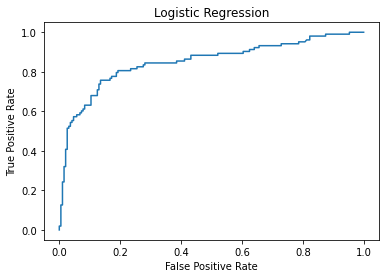

In [96]:

plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [100]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.8012237055016183


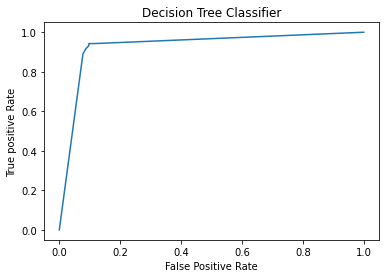

0.9228104773462784

In [104]:
#Decision Tree Curve
y_pred_prob=dt.predict_proba(x_test)[:,0]
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# Ensemble Techniques

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8372881355932204
[[171  21]
 [ 27  76]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       192
           1       0.78      0.74      0.76       103

    accuracy                           0.84       295
   macro avg       0.82      0.81      0.82       295
weighted avg       0.84      0.84      0.84       295



# Saving the model

In [113]:
import joblib
joblib.dump(dt,'dtfile.obj')

['dtfile.obj']

In [116]:
file=joblib.load('dtfile.obj')

In [117]:
file.predict(x_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)